In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# upload data
c1 = np.loadtxt('data1.txt', delimiter = ',')
c2 = np.loadtxt('data2.txt',delimiter = ',')
c3 = np.loadtxt('data3.txt',delimiter = ',')

In [3]:
c3

array([[ 1999.   ,    77.654],
       [ 2000.   ,    80.05 ],
       [ 2001.   ,    84.95 ],
       [ 2002.   ,    87.012],
       [ 2005.   ,    93.37 ],
       [ 2006.   ,    95.64 ],
       [ 2007.   ,    97.793],
       [ 2008.   ,    98.627],
       [ 2009.   ,    99.64 ],
       [ 2010.   ,    98.335],
       [ 2011.   ,    99.303],
       [ 2012.   ,    99.588],
       [ 2014.   ,   100.   ]])

### Subplotting in Python

### Two Subplots, share x

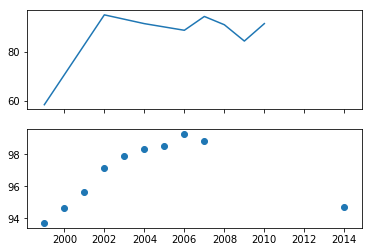

In [4]:
fig1, axs1 = plt.subplots(ncols = 1, nrows=2, sharex = True) 

axs1[0].plot(c1[:,0],c1[:,1])
axs1[1].scatter(c2[:,0],c2[:,1])

### 4 subplots

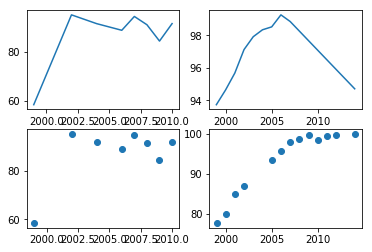

In [5]:
fig2, axs2 = plt.subplots(ncols=2,nrows=2)

axs2[0,0].plot(c1[:,0],c1[:,1])
axs2[1,0].scatter(c1[:,0],c1[:,1])
axs2[0,1].plot(c2[:,0],c2[:,1])
axs2[1,1].scatter(c3[:,0],c3[:,1])

### 3 Subplots

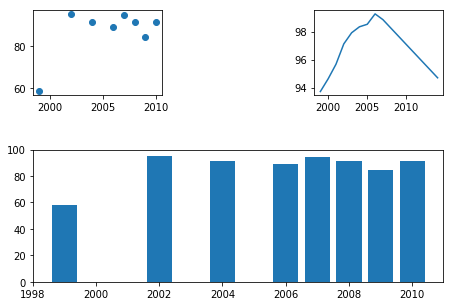

In [6]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15,5))



# Build a grid
gs1 = gridspec.GridSpec(nrows=6, ncols=6, left=0.10, right=0.48, wspace=0.2)
ax1 = fig.add_subplot(gs1[-3:, :])
ax2 = fig.add_subplot(gs1[:-4, :-4])
ax3 = fig.add_subplot(gs1[:-4, -2:])

# plot on that grid

ax1.bar(c1[:,0],c1[:,1])
ax2.scatter(c1[:,0],c1[:,1])
ax3.plot(c2[:,0],c2[:,1])



### Two plots of a different size

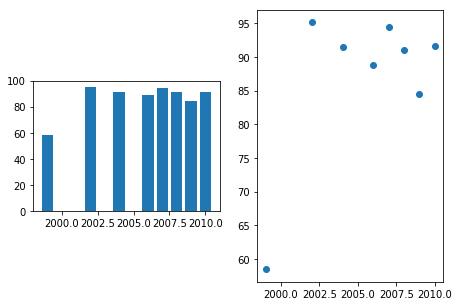

In [9]:
fig = plt.figure(figsize=(15,5))



# Build a grid
gs1 = gridspec.GridSpec(nrows=4, ncols=2, left=0.10, right=0.48, wspace=0.2)

ax1 = fig.add_subplot(gs1[1:3, 0])
ax2 = fig.add_subplot(gs1[:, 1])

ax1.bar(c1[:,0],c1[:,1])
ax2.scatter(c1[:,0],c1[:,1])


In [10]:
def add_subplot_axes(ax,rect,axisbg='w'):
    # these get the positions of the 
    fig = plt.gcf()
    #This bit gets the coordinates of the big axis
    box = ax.get_position()
    width = box.width
    height = box.height
    
    #Takes the positions in rectangle box 1 and 2 and puts them in their relative position
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    
    # Scales the width of the smaller axis
    width *= rect[2]
    height *= rect[3]  
    
    #Makes a new axis  and puts it on the current figure
    subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

C:\Users\jgarber\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


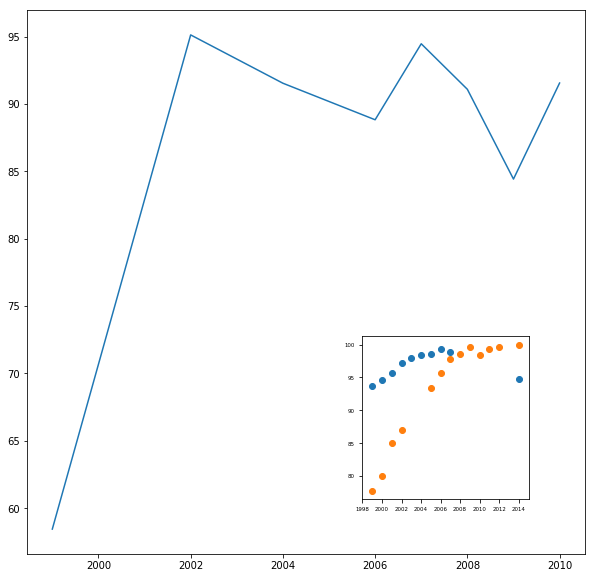

In [11]:
# First make the plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.plot(c1[:,0],c1[:,1])

# this tells me what proportion of the bigger axis I want to fill 1st two are x and y coords, 2nd two are
rect = [0.6,0.1,0.3,0.3]

subax1 = add_subplot_axes(ax,rect,axisbg='w')
subax1.scatter(c2[:,0],c2[:,1])
subax1.scatter(c3[:,0],c3[:,1])